## Compare torsion energies calculated with OpenMM, Numpy and Tensorflow

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from torsionfit.database import qmdatabase as ScanSet
import torsionfit.model as Model
from torsionfit.backends import sqlite_plus
from torsionfit import parameters
from parmed.charmm import CharmmParameterSet, CharmmPsfFile
import torsionfit.parameters as par
import numpy as np
from edward.models import Normal, Categorical, Uniform
import tensorflow as tf
from simtk import unit
import copy
import warnings

Turn off all parameters besides the torsion energy

In [2]:
param = CharmmParameterSet('../param/par_all36_cgenff.prm', '../param/top_all36_cgenff.rtf')
scan = 'MP2_torsion_scan/'
structure_no_charge = '../structure/butane_charge_off.psf'

structure = CharmmPsfFile('../structure/butane_charge_off.psf')

param_dih = par.turn_off_params(structure, param, bonds=True, angles=True, dihedral=False, urey_bradley=True, lj=True)

In [3]:
no_charge = ScanSet.parse_psi4_out(scan, structure_no_charge, pattern='*.out2')
scan_dih = no_charge.remove_nonoptimized()
scan_dih.compute_energy(param_dih)

[Psi /Users/sternc1/src/ChayaSt/torsionfit_examples/butane/torsion_scans/MP2_torsion_scan/0/butane_0.out2 WARNING] In logfileparser.py, line 471, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/sternc1/src/ChayaSt/torsionfit_examples/butane/torsion_scans/MP2_torsion_scan/10/butane_10.out2 WARNING] In logfileparser.py, line 471, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/sternc1/src/ChayaSt/torsionfit_examples/butane/torsion_scans/MP2_torsion_scan/20/butane_20.out2 WARNING] In logfileparser.py, line 471, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~


/Users/sternc1/anaconda/envs/tensorflow3/lib/python3.6/site-packages/torsionfit-0+untagged.587.gb3d558a.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:190: UserWarning: Warning: Optimizer failed for /Users/sternc1/src/ChayaSt/torsionfit_examples/butane/torsion_scans/MP2_torsion_scan/10/butane_10.out2
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/sternc1/src/ChayaSt/torsionfit_examples/butane/torsion_scans/MP2_torsion_scan/30/butane_30.out2 WARNING] In logfileparser.py, line 471, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/sternc1/src/ChayaSt/torsionfit_examples/butane/torsion_scans/MP2_torsion_scan/40/butane_40.out2 WARNING] In logfileparser.py, line 471, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/sternc1/src/ChayaSt/torsionfit_examples/butane/torsion_scans/MP2_torsion_scan/50/butane_50.out2 WARNING] In logfileparser.py, line 471, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/sternc1/src/ChayaSt/torsionfit_examples/butane/torsion_scans/MP2_torsion_scan/60/butane_60.out2 WARNING] In logfileparser.py, line 471, line not all dashes a

[Psi /Users/sternc1/src/ChayaSt/torsionfit_examples/butane/torsion_scans/MP2_torsion_scan/330/butane_330.out2 WARNING] In logfileparser.py, line 471, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/sternc1/src/ChayaSt/torsionfit_examples/butane/torsion_scans/MP2_torsion_scan/340/butane_340.out2 WARNING] In logfileparser.py, line 471, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/sternc1/src/ChayaSt/torsionfit_examples/butane/torsion_scans/MP2_torsion_scan/350/butane_350.out2 WARNING] In logfileparser.py, line 471, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/sternc1/src/ChayaSt/torsionfit_examples/butane/torsion_scans/MP2_torsion_scan/360/butane_360.out2 WARNING] In logfileparser.py, line 471, line not all 

In [4]:
# Now turn off only dihedrals to check if residuals match dihedral energy
structure = '../structure/butane.psf'
structure_charmm = CharmmPsfFile('../structure/butane.psf')
param_no_dih = par.turn_off_params(structure_charmm, param, dihedral=True)

In [5]:
scan_no_dih = ScanSet.parse_psi4_out(scan, structure, pattern='*.out2')
scan_no_dih = scan_no_dih.remove_nonoptimized()
scan_no_dih.compute_energy(param_no_dih)

[Psi /Users/sternc1/src/ChayaSt/torsionfit_examples/butane/torsion_scans/MP2_torsion_scan/0/butane_0.out2 WARNING] In logfileparser.py, line 471, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/sternc1/src/ChayaSt/torsionfit_examples/butane/torsion_scans/MP2_torsion_scan/10/butane_10.out2 WARNING] In logfileparser.py, line 471, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/sternc1/src/ChayaSt/torsionfit_examples/butane/torsion_scans/MP2_torsion_scan/20/butane_20.out2 WARNING] In logfileparser.py, line 471, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~


/Users/sternc1/anaconda/envs/tensorflow3/lib/python3.6/site-packages/torsionfit-0+untagged.587.gb3d558a.dirty-py3.6.egg/torsionfit/database/qmdatabase.py:190: UserWarning: Warning: Optimizer failed for /Users/sternc1/src/ChayaSt/torsionfit_examples/butane/torsion_scans/MP2_torsion_scan/10/butane_10.out2
  warnings.warn("Warning: Optimizer failed for {}".format(f))


[Psi /Users/sternc1/src/ChayaSt/torsionfit_examples/butane/torsion_scans/MP2_torsion_scan/30/butane_30.out2 WARNING] In logfileparser.py, line 471, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/sternc1/src/ChayaSt/torsionfit_examples/butane/torsion_scans/MP2_torsion_scan/40/butane_40.out2 WARNING] In logfileparser.py, line 471, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/sternc1/src/ChayaSt/torsionfit_examples/butane/torsion_scans/MP2_torsion_scan/50/butane_50.out2 WARNING] In logfileparser.py, line 471, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/sternc1/src/ChayaSt/torsionfit_examples/butane/torsion_scans/MP2_torsion_scan/60/butane_60.out2 WARNING] In logfileparser.py, line 471, line not all dashes a

[Psi /Users/sternc1/src/ChayaSt/torsionfit_examples/butane/torsion_scans/MP2_torsion_scan/330/butane_330.out2 WARNING] In logfileparser.py, line 471, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/sternc1/src/ChayaSt/torsionfit_examples/butane/torsion_scans/MP2_torsion_scan/340/butane_340.out2 WARNING] In logfileparser.py, line 471, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/sternc1/src/ChayaSt/torsionfit_examples/butane/torsion_scans/MP2_torsion_scan/350/butane_350.out2 WARNING] In logfileparser.py, line 471, line not all dashes as expected: --------------------------------------------------------------------------------------------- ~
[Psi /Users/sternc1/src/ChayaSt/torsionfit_examples/butane/torsion_scans/MP2_torsion_scan/360/butane_360.out2 WARNING] In logfileparser.py, line 471, line not all 

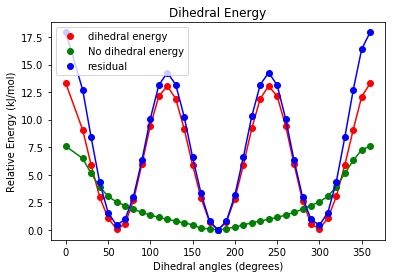

In [6]:
plt.plot(scan_dih.angles, scan_dih.mm_energy, 'o', color='red', label='dihedral energy')
plt.plot(scan_dih.angles, scan_dih.mm_energy, color='red')
plt.plot(scan_dih.angles, scan_no_dih.mm_energy, 'o', color='green', label='No dihedral energy')
plt.plot(scan_dih.angles, scan_no_dih.mm_energy, color='green')
plt.plot(scan_dih.angles, scan_no_dih.delta_energy, 'o', color='blue', label='residual')
plt.plot(scan_dih.angles, scan_no_dih.delta_energy, color='blue')
plt.legend()
plt.xlabel('Dihedral angles (degrees)')
plt.ylabel('Relative Energy (kJ/mol)')
plt.title('Dihedral Energy');
plt.savefig('dihedral_res_energy.pdf')

In [7]:
# Tensorflow interactive session
tf.InteractiveSession()
scan_dih.build_phis()
to_optimize = list(scan_dih.phis.keys())

In [8]:
# time and Test Tensorflow Fourier sum vs numpy

# Numpy
length = 0
to_optimize = list(scan_dih.phis.keys())
K_np = np.zeros((len(scan_dih.phis), 6))
n_np = np.array([1., 2., 3., 4., 5., 6.])
for i, t in enumerate(to_optimize):
    dih_param = param_dih.dihedral_types[t]
    for k in dih_param:
        m = k.per
        K_np[i][m-1] = k.phi_k*4.184
        if k.phase == 180.0:
            K_np[i][m-1] = -k.phi_k*4.184
    if scan_dih.phis[t].shape[-1] > length:
        length = scan_dih.phis[t].shape[-1]

K_tf = tf.constant(K_np, dtype=tf.float32, shape=(1, 5, 6))

n_np = np.array([1., 2., 3., 4., 5., 6.])
n_tf = tf.constant(n_np, dtype=tf.float32)

# phis for tf
phis = {}
for t in to_optimize:
    phis[t] = tf.constant(scan_dih.phis[t], shape=(36, scan_dih.phis[t].shape[-1], 1), dtype=tf.float32)


In [9]:
# Precalculate 1+cos(n*phi)
phis_np = np.zeros((36, 6, 5))
phis_np_dict = {}
phis_tf_dict = {}
for i, t in enumerate(to_optimize):
    phis_np[:, :, i] = (1+np.cos(scan_dih.phis[t][:, np.newaxis]*n_np[:, np.newaxis])).sum(-1)
    phis_np_dict[t] = phis_np[:, :, i]
    phis_tf_dict[t] = tf.constant(phis_np[:, :, i], tf.float32)
phis_tf = tf.constant(phis_np, dtype=tf.float32)  

In [10]:
%%time
# numpy dot product and trace
np_dot_trace = (phis_np.dot(K_np)).trace(axis1=1, axis2=2)

CPU times: user 151 µs, sys: 42 µs, total: 193 µs
Wall time: 133 µs


In [11]:
K_np_t = K_np.transpose()

In [12]:
%%time
# numpy element-wise product and sum
np_elem_sum = (K_np_t[np.newaxis, :,:]*phis_np).sum(1).sum(1)

CPU times: user 395 µs, sys: 165 µs, total: 560 µs
Wall time: 411 µs


In [14]:
%%time
# Calculate Fourier sum numpy via looping through dihedral types
Fourier_sum_np_pre = np.zeros((36))
for i, t in enumerate(to_optimize):
    Fourier_sum_np_pre +=(K_np[i, :]*phis_np_dict[t]).sum(1)


CPU times: user 136 µs, sys: 2 µs, total: 138 µs
Wall time: 143 µs


In [15]:
%%time
# Calculate Fourier sum numpy without precalculating cos
Fourier_sum_np = np.zeros((36))
for i, t in enumerate(to_optimize):
    Fourier_sum_np +=(K_np_t[:, i][:, np.newaxis]*(1+np.cos((scan_dih.phis[t][:, np.newaxis]*n_np[:, np.newaxis])))).sum(1).sum(1)

CPU times: user 1.12 ms, sys: 761 µs, total: 1.88 ms
Wall time: 1.1 ms


In [23]:
# Transpose K_tf
K_tf_t = tf.constant(K_np_t, dtype=tf.float32)


In [17]:
%%time
# Calculate Fourier sum tensorflow without precalculating cos
Fourier_sum_tf = tf.Variable(tf.zeros([36]))
tf.global_variables_initializer().run()
for i, t in enumerate(to_optimize):
    energy = tf.reduce_sum(tf.reduce_sum(K_tf[:,i]*(1+tf.cos(phis[t]*n_tf)), axis=1), axis=1)
    Fourier_sum_tf = tf.assign_add(ref=Fourier_sum_tf, value=energy, use_locking=True)

CPU times: user 142 ms, sys: 2.86 ms, total: 144 ms
Wall time: 143 ms


In [19]:
%%time
# Calculate Fourier sum tensorflow, precalculate cos
Fourier_sum_tf_pre = tf.Variable(tf.zeros([36]))
tf.global_variables_initializer().run()
energies = []
for i, t in enumerate(to_optimize):
    energy = (tf.reduce_sum(K_tf[:,i]*phis_tf_dict[t], axis=1))
    Fourier_sum_tf_pre = tf.assign_add(ref=Fourier_sum_tf_pre, value=energy, use_locking=True)

CPU times: user 87.3 ms, sys: 2.18 ms, total: 89.5 ms
Wall time: 88.2 ms


In [21]:
%%time
# Calculate Fourier sum tensorflow
tf_dot_trace = tf.trace(tf.matmul(phis_tf, K_tf))

ValueError: Dimension 0 in both shapes must be equal, but are 36 and 1 for 'MatMul' (op: 'BatchMatMul') with input shapes: [36,6,5], [1,5,6].

In [24]:
%%time
# Try tf.multiply
tf_elem_sum = tf.reduce_sum(tf.reduce_sum(tf.multiply(phis_tf, K_tf_t), axis=1), axis=1)

CPU times: user 6.72 ms, sys: 857 µs, total: 7.58 ms
Wall time: 6.81 ms


The numpy dot product and trace is the fastest - an order of magnitude faster than tensorflow's element-wise multiplication and sum. I couldn't get the dot and trace to work in tensorflow because I couldn't get the broadcasting of K to work properly.

In [38]:
%%time
scan_dih.compute_energy(param_dih)

CPU times: user 9.94 ms, sys: 22.8 ms, total: 32.8 ms
Wall time: 22.3 ms


In [42]:
Fourier_sum_tf = Fourier_sum_tf.eval()
Fourier_sum_tf_pre = Fourier_sum_tf_pre.eval()
tf_elem_sum = tf_elem_sum.eval()

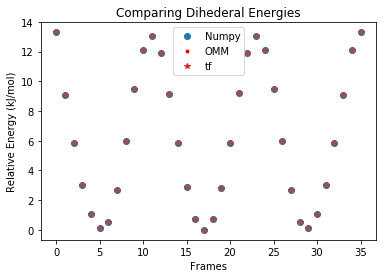

In [55]:
# Plot all energies
plt.plot(Fourier_sum_np-min(Fourier_sum_np), 'o', label='Numpy')
plt.plot(np_dot_trace - min(np_dot_trace), '.')
plt.plot(np_elem_sum - min(np_elem_sum), '.')
plt.plot(scan_dih.mm_energy, '.', color='red',label='OMM')
plt.plot(Fourier_sum_tf-min(Fourier_sum_tf), '*', label='tf')
plt.plot(Fourier_sum_tf_pre - min(Fourier_sum_tf_pre), '.')
plt.plot(tf_elem_sum - min(tf_elem_sum), '.')
plt.legend()
plt.title('Comparing Dihederal Energies')
plt.ylabel('Relative Energy (kJ/mol)')
plt.xlabel('Frames');